In [2]:

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Imports
from classes import ChargeCollection, SimulatedAnnealing

def main(N,c,chain,iterations):
    simulated_annealing = SimulatedAnnealing(
        charges=ChargeCollection(N), 
        max_stepsize=0.5, 
        chain_length = chain,
        cooling_rate=c,
        init_temperature=100
    )

    simulated_annealing.run(
        iterations=iterations, 
        verbose=True, 
        animate=False, 
        save=True
    )

    # simulated_annealing.charges.plot_charges()
    min_energy = simulated_annealing.energy

    return min_energy


In [ ]:
import statistics

c = 0.7
chain = 50
iterations = 50*50
x=30
for N in [11,12,14,16,17]:
    en_arr = []
    for i in range(x):
        e = main(N,c,chain,iterations)
        en_arr.append(e)
    print(N,min(en_arr))
    print(N,en_arr)

In [ ]:
# loop through funtion to produce multiple simulations saving the final energies to use for the bar graph

N = 14      # = number of charges
c = 0.7    # = cooling rate (lower = faster cooling, but more iterations near zero)
simulations = range(20)

e_arr_10 = []
e_arr_50 = []
e_arr_100 = []
e_arr_200 = []

chain = 10
iterations = 50*chain
for s in simulations:
    e = main(N,c,chain,iterations)
    e_arr_10.append(e)

chain = 50
iterations = 50*chain
for s in simulations:
    e = main(N,c,chain,iterations)
    e_arr_50.append(e)

chain = 100
iterations = 50*chain
for s in simulations:
    e = main(N,c,chain,iterations)
    e_arr_100.append(e)

chain = 200
iterations = 50*chain
for s in simulations:
    e = main(N,c,chain,iterations)
    e_arr_200.append(e)

# Bar graphs of global and local final states

### Convergence based on number of charges

In [ ]:
# Each array contains the final energies of multiple simulations 
# Based on the configurations filter arrays to identify global and local states
e_11 = np.array(e_arr_11)
b11 = np.where(e_11<48.6,1,0)

e_12 = np.array(e_arr_12)
b12 = np.where(e_12<59.7,1,0)

e_14 = np.array(e_arr_14)
b14 = np.where(e_14<85.7,1,0)

e_16 = np.array(e_arr_16)
b16 = np.where(e_16<116.6,1,0)

e_17 = np.array(e_arr_17)
b17 = np.where(e_17<134.0,1,0)

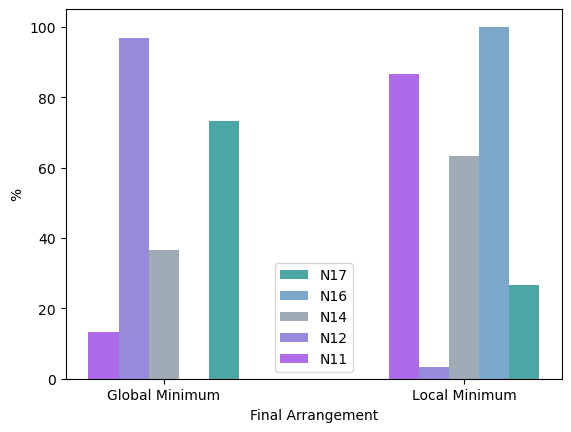

In [222]:
x = np.arange(2)

plt.bar(x+0.2,[sum(b17)*100/30,(30-sum(b17))*100/30],width=0.1, alpha=0.7,color = 'teal')
plt.bar(x+0.1,[sum(b16)*100/30,(30-sum(b16))*100/30],width=0.1, alpha=0.7,color = 'steelblue')
plt.bar(x,[sum(b14)*100/30,(30-sum(b14))*100/30],width=0.1, alpha=0.7,color='lightslategrey')
plt.bar(x-0.1,[sum(b12)*100/30,(30-sum(b12))*100/30],width=0.1,  alpha=0.7,color='slateblue')
plt.bar(x-0.2,[sum(b11)*100/30,(30-sum(b11))*100/30],width=0.1, alpha=0.7,color = 'blueviolet')

plt.xticks(x,['Global Minimum','Local Minimum'])
plt.ylabel('%')
plt.xlabel('Final Arrangement')
plt.legend(['N17','N16','N14','N12','N11'],loc='best')
plt.savefig('global local bar copy.png')


### Convergence based on Cooling rate

In [ ]:
e_linear = np.array(e_arr_linear)
blinear = np.where(e_linear<85.7,1,0)

e_3 = np.array(e_arr_3)
b3 = np.where(e_3<85.7,1,0)

e_6 = np.array(e_arr_6)
b6 = np.where(e_6<85.7,1,0)

e_9 = np.array(e_arr_9)
b9 = np.where(e_9<85.7,1,0)

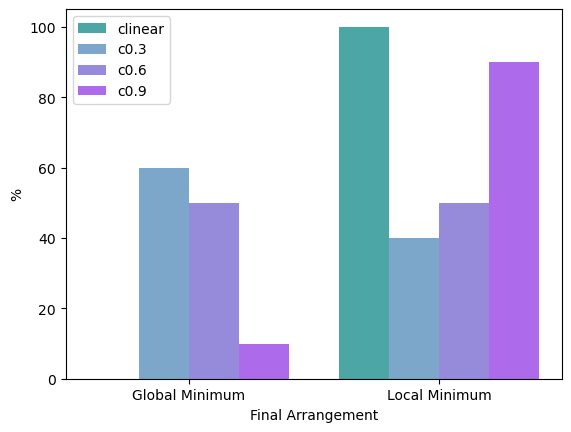

In [ ]:
x = np.arange(2)

plt.bar(x-0.3,[sum(blinear)*100/10,(10-sum(blinear))*100/10],width=0.2, alpha=0.7,color = 'teal')
plt.bar(x-0.1,[sum(b3)*100/10,(10-sum(b3))*100/10],width=0.2, alpha=0.7,color = 'steelblue')
plt.bar(x+0.1,[sum(b6)*100/10,(10-sum(b6))*100/10],width=0.2,  alpha=0.7,color='slateblue')
plt.bar(x+0.3,[sum(b9)*100/10,(10-sum(b9))*100/10],width=0.2, alpha=0.7,color = 'blueviolet')
# plt.bar(x-0.1,[sum(b8)*100/10,(10-sum(b8))*100/10],width=0.1, color = 'orange', alpha=0.7)
plt.xticks(x,['Global Minimum','Local Minimum'])
plt.ylabel('%')
plt.xlabel('Final Arrangement')
plt.legend(['clinear','c0.3','c0.6','c0.9'],loc='best')
plt.savefig('global local bar copy cooling.png')

### Convergence based on Markov Chain Length

In [ ]:
# Each array contains the final energy of a simulation
# Based on the configurations filter arrays to identify global and local states
e_10 = np.array(e_arr_10)
b10 = np.where(e_10<85.7,1,0)

e_50 = np.array(e_arr_50)
b50 = np.where(e_50<85.7,1,0)

e_100 = np.array(e_arr_100)
b100 = np.where(e_100<85.7,1,0)

e_200 = np.array(e_arr_200)
b200 = np.where(e_200<85.7,1,0)

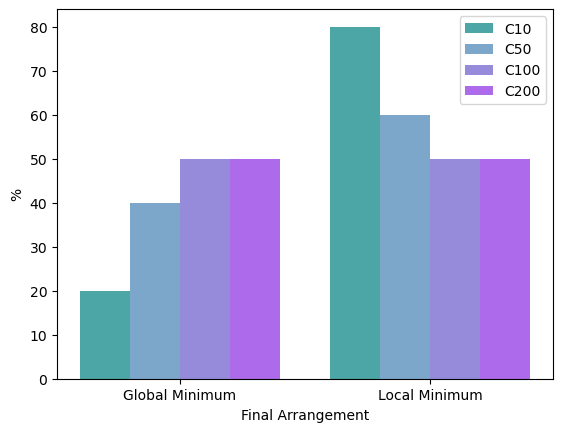

In [237]:
# plot global and local states for each test
x = np.arange(2)

plt.bar(x-0.3,[sum(b10)*100/10,(10-sum(b10))*100/10],width=0.2, alpha=0.7,color = 'teal')
plt.bar(x-0.1,[sum(b50)*100/10,(10-sum(b50))*100/10],width=0.2, alpha=0.7,color = 'steelblue')
plt.bar(x+0.1,[sum(b100)*100/10,(10-sum(b100))*100/10],width=0.2,  alpha=0.7,color='slateblue')
plt.bar(x+0.3,[sum(b200)*100/10,(10-sum(b200))*100/10],width=0.2, alpha=0.7,color = 'blueviolet')

plt.xticks(x,['Global Minimum','Local Minimum'])
plt.ylabel('%')
plt.xlabel('Final Arrangement')
plt.legend(['C10','C50','C100','C200'],loc='best')
plt.savefig('global local bar copy chain.png')

# Trajectories with different cooling rates

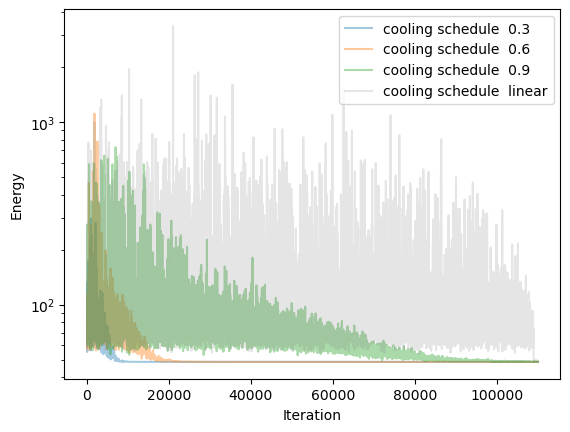

In [ ]:
# Iteration and energy

files = os.listdir('data/data-copy')

for file in files:
    if ('_11_' in file)&('10000' in file)&('Copy' in file):

        df = pd.read_csv(os.path.join('data/data-copy',file))
        file = file.replace(".csv","").replace(" - Copy","")
        params = file.split('_')
        try:
            cooling = round(float(params[-1]),2)
        except:
            cooling = params[-1]

        if cooling == 'linear':
            plt.plot(df.index,df["# energy"],label = "cooling schedule  {}".format(cooling),alpha=0.2,c='grey')
        else:
            plt.plot(df.index,df["# energy"],label = "cooling schedule  {}".format(cooling),alpha=0.4)

plt.legend(loc='best')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.yscale('log',base=10)
# plt.ylim(0,200)
# plt.xlim(0,210)
plt.savefig('N11 cooling rate changes single sim.png')
plt.show()

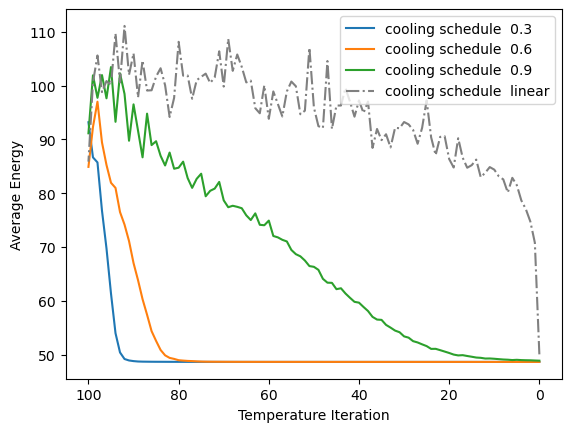

In [57]:
files = os.listdir('data/data-copy')
fig, ax = plt.subplots()

for file in files:
    if ('_11_' in file)&('10000' in file)&('Copy' not in file):

        df = pd.read_csv(os.path.join('data/data-copy',file))
        file = file.replace(".csv","")
        params = file.split('_')

        # df_g = df.groupby(' temperature',as_index=False).agg({'# energy':'mean'})
        df = df.groupby(' temperature',as_index=False).agg({'# energy':['mean',statistics.variance]})

        df['upper_CI'] = df['# energy']['mean']+1.96*np.sqrt(df['# energy']['variance'])/np.sqrt(5)
        df['lower_CI'] = df['# energy']['mean']-1.96*np.sqrt(df['# energy']['variance'])/np.sqrt(5)
        
        try:
            cooling = round(float(params[-1]),2)
        except:
            cooling = params[-1]

        if cooling == 'linear':
            ax.plot(df.index, df['# energy']['mean'],label = "cooling schedule  {}".format(cooling),c='grey',linestyle = 'dashdot')
            # ax.fill_between(df.index, df['lower_CI'],df['upper_CI'],  alpha=.2, color='grey')
        else:
            ax.plot(df.index, df['# energy']['mean'],label = "cooling schedule  {}".format(cooling))
            # ax.fill_between(df.index, df['lower_CI'],df['upper_CI'],  alpha=.3)
ax.invert_xaxis()
plt.legend(loc='upper right')
plt.xlabel('Temperature Iteration')
plt.ylabel('Average Energy')
# plt.yscale('log',base=10)
# plt.ylim(0,200)
# plt.xlim(0,210)
plt.savefig('N11 cooling rate sim average new.png')
plt.show()

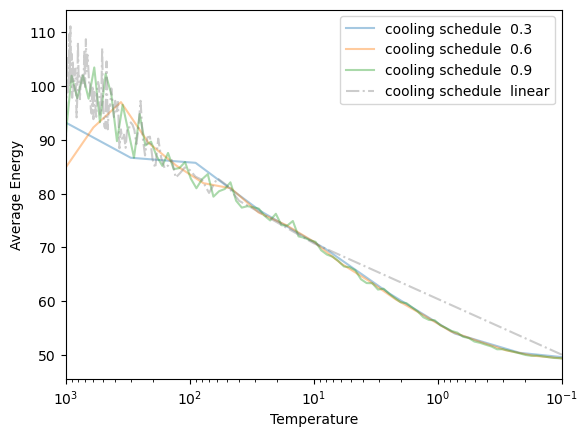

In [56]:
files = os.listdir('data/data-copy')
fig, ax = plt.subplots()

for file in files:
    if ('_11_' in file)&('10000_' in file)&('T0_1000' in file)&('Copy' not in file):

        df = pd.read_csv(os.path.join('data/data-copy',file))
        file = file.replace(".csv","")
        params = file.split('_')

        # df_g = df.groupby(' temperature',as_index=False).agg({'# energy':'mean'})
        df = df.groupby(' temperature',as_index=False).agg({'# energy':['mean',statistics.variance]})

        df['upper_CI'] = df['# energy']['mean']+1.96*np.sqrt(df['# energy']['variance'])/np.sqrt(5)
        df['lower_CI'] = df['# energy']['mean']-1.96*np.sqrt(df['# energy']['variance'])/np.sqrt(5)
        
        try:
            cooling = round(float(params[-1]),2)
        except:
            cooling = params[-1]

        if cooling == 'linear':
            ax.plot(df[' temperature'], df['# energy']['mean'],label = "cooling schedule  {}".format(cooling),alpha=0.4,c='grey',linestyle = 'dashdot')
            # ax.fill_between(df[' temperature'], df['lower_CI'],df['upper_CI'],  alpha=.2,color='grey')
        else:
            ax.plot(df[' temperature'], df['# energy']['mean'],label = "cooling schedule  {}".format(cooling),alpha=0.4)
            # ax.fill_between(df[' temperature'], df['lower_CI'],df['upper_CI'],  alpha=.3)

ax.invert_xaxis()
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Average Energy')
plt.xscale('log',base=10)
# plt.ylim(0,200)
plt.xlim(1000,0.1)
plt.savefig('N11 cooling rate sim average temp.png')
plt.show()

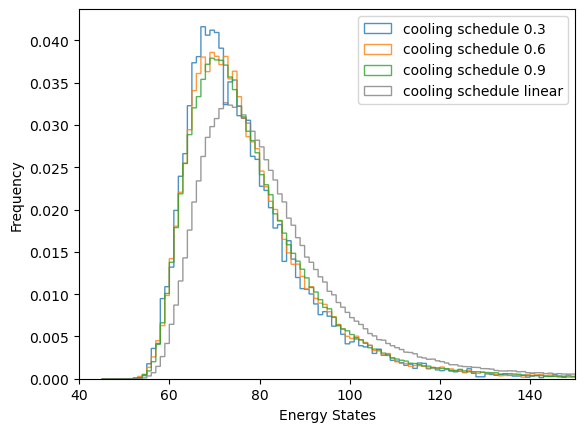

In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# files = os.listdir('data')
# files

# for file in files:
#     if ('_11_' in file)&('10000' in file)&('Copy' not in file):
        
#         # print(file)
#         df = pd.read_csv(os.path.join('data',file))
#         df = df.loc[df[' temperature']>5]
#         # print(df.head)
#         file = file.replace(".csv","").replace(" - Copy","")
#         params = file.split('_')
#         if params[-1]=='linear':
#             plt.hist(df["# energy"],bins=np.arange(45, 2000,1),density=True,label = "cooling schedule {}".format(params[-1]),color='grey',alpha=0.8,histtype='step') #bins=np.arange(45, 2000,10)
#         else:
#             plt.hist(df["# energy"],bins=np.arange(45, 2000,1),density=True,label = "cooling schedule {}".format(round(float(params[-1]),2)),alpha=0.8,histtype='step')
# plt.legend(loc='best')
# plt.xlim(40,150)
# # plt.xscale('log')
# plt.xlabel('Energy States')
# plt.ylabel('Frequency')
# plt.savefig('N11 hist cooling all sims.png'.format(params[-1]))
# plt.show()

# Trajectories with different markov chain lengths

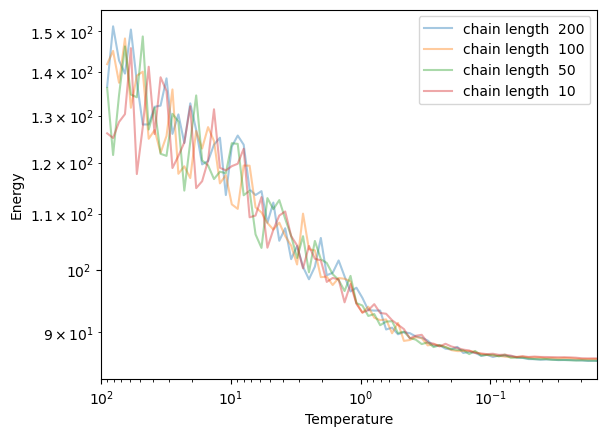

In [259]:
# Iteration and energy
fig, ax = plt.subplots()
for file in [
    "20000_N_14_iters_max_step_0.5_T0_100_cooling_0.9_chain_200.csv",
"10000_N_14_iters_max_step_0.5_T0_100_cooling_0.9_chain_100.csv",
"5000_N_14_iters_max_step_0.5_T0_100_cooling_0.9_chain_50.csv",
"1000_N_14_iters_max_step_0.5_T0_100_cooling_0.9_chain_10.csv",
]:
    
    df = pd.DataFrame()
    y = 0
    for i in range(5):
        dff = pd.read_csv(os.path.join('data',str(i+1),file))
        x = min(dff['# energy'])

        dff = dff.drop_duplicates(' temperature',keep='last')
        df =pd.concat([df,dff],ignore_index=True)
    df = df.groupby(' temperature',as_index=False).agg({'# energy':['mean',np.std]})

    df['upper_CI'] = df['# energy']['mean']+1.96*df['# energy']['std']/np.sqrt(5)
    df['lower_CI'] = df['# energy']['mean']-1.96*df['# energy']['std']/np.sqrt(5)
    file = file.replace(".csv","").replace(" - Copy","")
    params = file.split('_')
    chain = params[-1]

    min_e = 85.385
    ax.plot(df[' temperature'],df["# energy"]['mean'],label = "chain length  {}".format(chain),alpha=0.4)
    # ax.fill_between(df[' temperature'], df['lower_CI'],df['upper_CI'],  alpha=.1)

ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(100,0.015)
plt.legend(loc='best')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.savefig('N14 chain length convergence 5sims log.png')
plt.show()

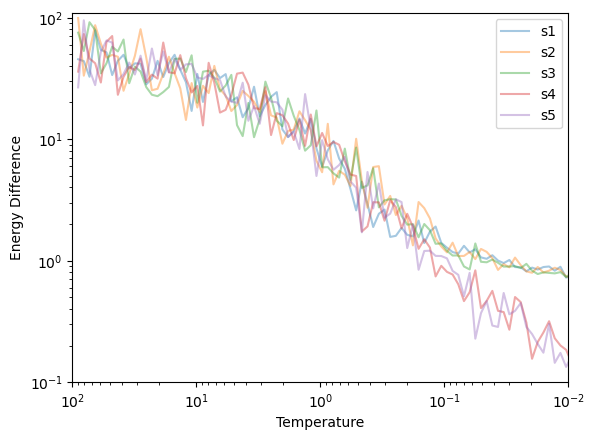

In [260]:
# Iteration and energy
fig, ax = plt.subplots()

for file in ["10000_N_14_iters_max_step_0.5_T0_100_cooling_0.9_chain_100.csv"]:
    for i in range(5):
        df = pd.read_csv(os.path.join('data',str(i+1),file))
        df = df.drop_duplicates(' temperature',keep='last')
        df = df.groupby(' temperature',as_index=False).mean('# energy')

        min_e = 85.42
        ax.plot(df[' temperature'],df["# energy"] - min_e,label = "s{}".format(i+1),alpha=0.4)

ax.invert_xaxis()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(100,0.01)
ax.set_ylim(0.1,110)
plt.legend(loc='best')
plt.xlabel('Temperature')
plt.ylabel('Energy Difference')
plt.savefig('N14 convergence.png')
plt.show()